In [53]:
import csv

all_words_with_freq: list[tuple[str, int]] = []
with open("../output/ainu_words_all.tsv", "r") as f:
    reader  = csv.reader(f, delimiter="\t")
    for word, freq in reader:
        all_words_with_freq.append((word, int(freq)))

# for 
# counter = Counter(csv.reader(f, delimiter="\t"))

print(all_words_with_freq[0:15])

[('a=', 54759), ('ne', 46015), ('wa', 42289), ('=an', 32322), ('kor', 27797), ('an', 26512), ('ka', 21514), ('ta', 19630), ('hine', 13924), ('e=', 13148), ('ki', 13072), ('kusu', 12746), ('an=', 12735), ('pe', 12679), ('ruwe', 12544)]


In [54]:
import ainconv
from collections import Counter

syllables_counter_tokens = Counter()
syllables_counter_terms = Counter()
for word, freq in all_words_with_freq:
    if any(c.isupper() or not c.isalpha() for c in word):
        continue
    syllables = ainconv.separate(word.lower().replace("=", ""))
    
    for syllable in syllables:
        if len(syllable) <= 1:
            continue
        if len(syllable) > 3:
            print(syllable)
            print()
        syllables_counter_tokens[syllable] += freq
        syllables_counter_terms[syllable] += 1

print(syllables_counter_tokens.most_common(15))
print(syllables_counter_terms.most_common(15))

nuyé

minz

nukár

kond

ramú

sutôb

eyám

senz

seng

sinb

koré

akkô

tôkyô

sitó

ring

ning

tenz

mací

erám

intâ

tyûg

senzyû

minz

wind

nakn

tuyé

astó

kotá

onáw

pirá

xxxxxxxx

isyô

etóy

kyôs

nikôd

hinb

senz

minz

erám

nuká

kenz

senzyû

mang

kankô

uhúy

hong

rohû

kang

huns

ramú

keré

huná

hurá

ninj

turá

appl

shôg

akkô

tusá

kang

eyáy

sens

sens

ityô

eyáy

sirô

nisúk

kenk

igyô

senjû

esír

kanj

hirô

sinzyô

senjû

minz

sizô

nanb

hantô

zyûzô

hôsô

kopán

hang

kenk

enkô

herâ

zyûrô

myôz

henshû

hutô

yakyû

hihô

marês

kanpô

kenkyû

netó

teké

kankôk

monb

hiryô

hirô

eyáy

sapá

rekôd

kirú

hikyû

panb

hekó

kamy

oryô

nuká

kôkô

sang

kondô

arús

kanz

ekár

mêkâ

mupêz

isám

enshô

orôz

marê

sess

resú

chûg

akkô

hopú

sentâ

ronb

satô

kôkô

ugyô

purê

kopó

tond

kotúk

kayh

mond

nomóm

ninj

mupêj

senkyû

matâ

rikkô

katô

inkô

esán

suzô

sing

rinzó

hinyôshû

assyû

sinkô

honb

kopás

koón

kenk



In [55]:
for item, freq in syllables_counter_tokens.most_common():
    if freq > 1:
        print(item, freq)

ne 120608
ka 105626
ta 55010
wa 49394
kor 45950
ki 41175
no 37405
pa 36614
an 36049
ko 34746
ke 34615
hi 32075
si 31848
nu 31583
ku 30965
ra 29912
pe 28718
su 26474
po 23629
ci 23316
ri 22888
we 22246
ru 22145
na 21063
re 20977
ni 20960
ma 18867
se 18024
tu 17315
ye 17085
kar 15483
to 15346
ha 14553
ro 13806
muy 13631
ya 12807
mo 12138
he 11777
un 11246
so 10903
te 10760
sa 10730
ho 10111
ay 10051
yay 9231
or 9226
yak 8707
tar 8568
nak 8034
tan 7700
kus 7440
pir 7358
sir 7260
suy 7175
kon 7029
ar 6817
kun 6734
kay 6651
tek 6647
sam 6464
mi 6406
pi 6236
wen 6233
mu 6048
pu 6041
hu 5969
me 5710
tak 5447
nep 4887
kur 4878
ray 4667
pak 4471
pon 4426
nis 4369
yu 4360
ca 3928
yan 3905
ran 3732
san 3724
mat 3564
kas 3496
on 3446
yo 3410
man 3373
in 3202
sin 3160
ek 3094
pun 3027
haw 2975
tap 2911
kan 2903
nan 2845
ok 2785
kew 2783
as 2735
koy 2636
ram 2565
cis 2562
ron 2505
sik 2393
rok 2333
soy 2269
son 2222
wan 2207
tuy 2202
nen 2185
us 2081
kat 2075
os 2060
pet 1981
teh 1963
rus 1955
kap 1

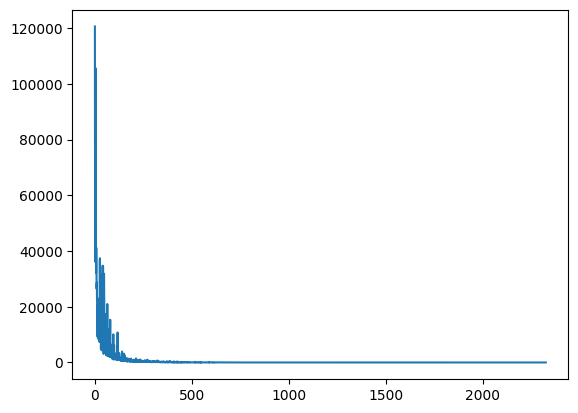

In [56]:
import matplotlib.pyplot as plt

plt.plot(list(syllables_counter_tokens.values()))
plt.show()

## 樺太アイヌ語の音節一覧

In [57]:
from collections import defaultdict
import regex


SAKHALIN_BOOKS = {
    "からふとのアイヌご（入門）",
    "カラフトのアイヌ語（中級）",
    "カラフトのアイヌ語（初級）",
    "ニューエクスプレス・スペシャル 日本語の隣人たち I+II",
    "ピウスツキ記念碑",
    "千徳太郎治のピウスツキ宛書簡",
    "浅井タケ昔話全集I,II",
}

words: dict[str, int] = defaultdict(int)

for book in SAKHALIN_BOOKS:
    with open("../../corpus/output/words_by_book/" + book + ".tsv") as f:
        for line in f:
            word, freq = line.strip().split("\t")

            if "mp" in word:
                word = word.replace("mp", "np")

            if word in ["m", "horo", "hetunaa", "pii", "cooruntee", "okta"]:
                continue

            if (len(word) > 3 and word.endswith("=")) or word.endswith("?"):
                word = word[:-1]
            if not word:
                continue

            if regex.match(r"^[\d\p{P}]+$", word):
                continue

            words[word] += int(freq)

print(len(words))

print(sorted(words.items(), key=lambda x: x[1], reverse=True)[:10])


4403
[('taa', 6713), ('manu', 2388), ('teh', 1353), ('ike', 1208), ('kusu', 1197), ('nah', 1092), ('tani', 1072), ('neanpe', 934), ('orowa', 898), ('horokewpo', 897)]


In [58]:
import ainconv
vowels = {"a", "i", "u", "e", "o"}
def split_sakhalin_words(word: str) -> list[str]:
    separated = ainconv.separate(word.lower().replace("=", ""))

    result = []
    for part in separated:
        if (
            result
            and part in vowels
            and len(result[-1]) > 0
            and result[-1][-1] == part
        ):
            result[-1] += part
        else:
            result.append(part)

    result = [result if result[0] not in vowels else "’" + result for result in result if result]
    result = [result[:-1] + 'n' if result[-1] == 'm' else result for result in result]
    return result


for word in ["neeta", "neh", "ah"]:
    print(word, split_sakhalin_words(word))

neeta ['nee', 'ta']
neh ['neh']
ah ['’ah']


In [59]:
import pandas as pd
# Parse the syllables into C (row key) and VC (column key)
from collections import Counter

syllable_counts = Counter(
    [syllable for word in words.keys() for syllable in split_sakhalin_words(word)]
)

row_order = ["’", "k", "s", "t", "c", "n", "h", "p", "m", "y", "r", "w"]
col_order = [
    "a",
    "i",
    "u",
    "e",
    "o",
    "aa",
    "ii",
    "uu",
    "ee",
    "oo",
    # aC
    "ay",
    "aw",
    "as",
    "an",
    "ah",
    # iC
    "is",
    "in",
    "ih",
    # "im",
    # uC
    "uy",
    "us",
    "un",
    "uh",
    # "um",
    "ey",
    "ew",
    "es",
    "en",
    "eh",
    # "em",
    "oy",
    "ow",
    "os",
    "on",
    "oh",
    # "om"
]

parsed_syllables = {}
for syllable, count in syllable_counts.items():
    if len(syllable) >= 2:
        c = syllable[0]
        vc = syllable[1:]
        if c not in parsed_syllables:
            parsed_syllables[c] = {}
        parsed_syllables[c][vc] = count

df = pd.DataFrame.from_dict(parsed_syllables, orient="index").fillna(0).astype(int)

df = df.reindex(index=row_order, columns=col_order).fillna(0).astype(int)

# extra_rows = [row for row in df.index if row not in row_order]
# extra_cols = [col for col in df.columns if col not in col_order]

# final_row_order = row_order + extra_rows
# final_col_order = col_order + extra_cols

# df = df.reindex(index=final_row_order, columns=final_col_order).fillna(0).astype(int)

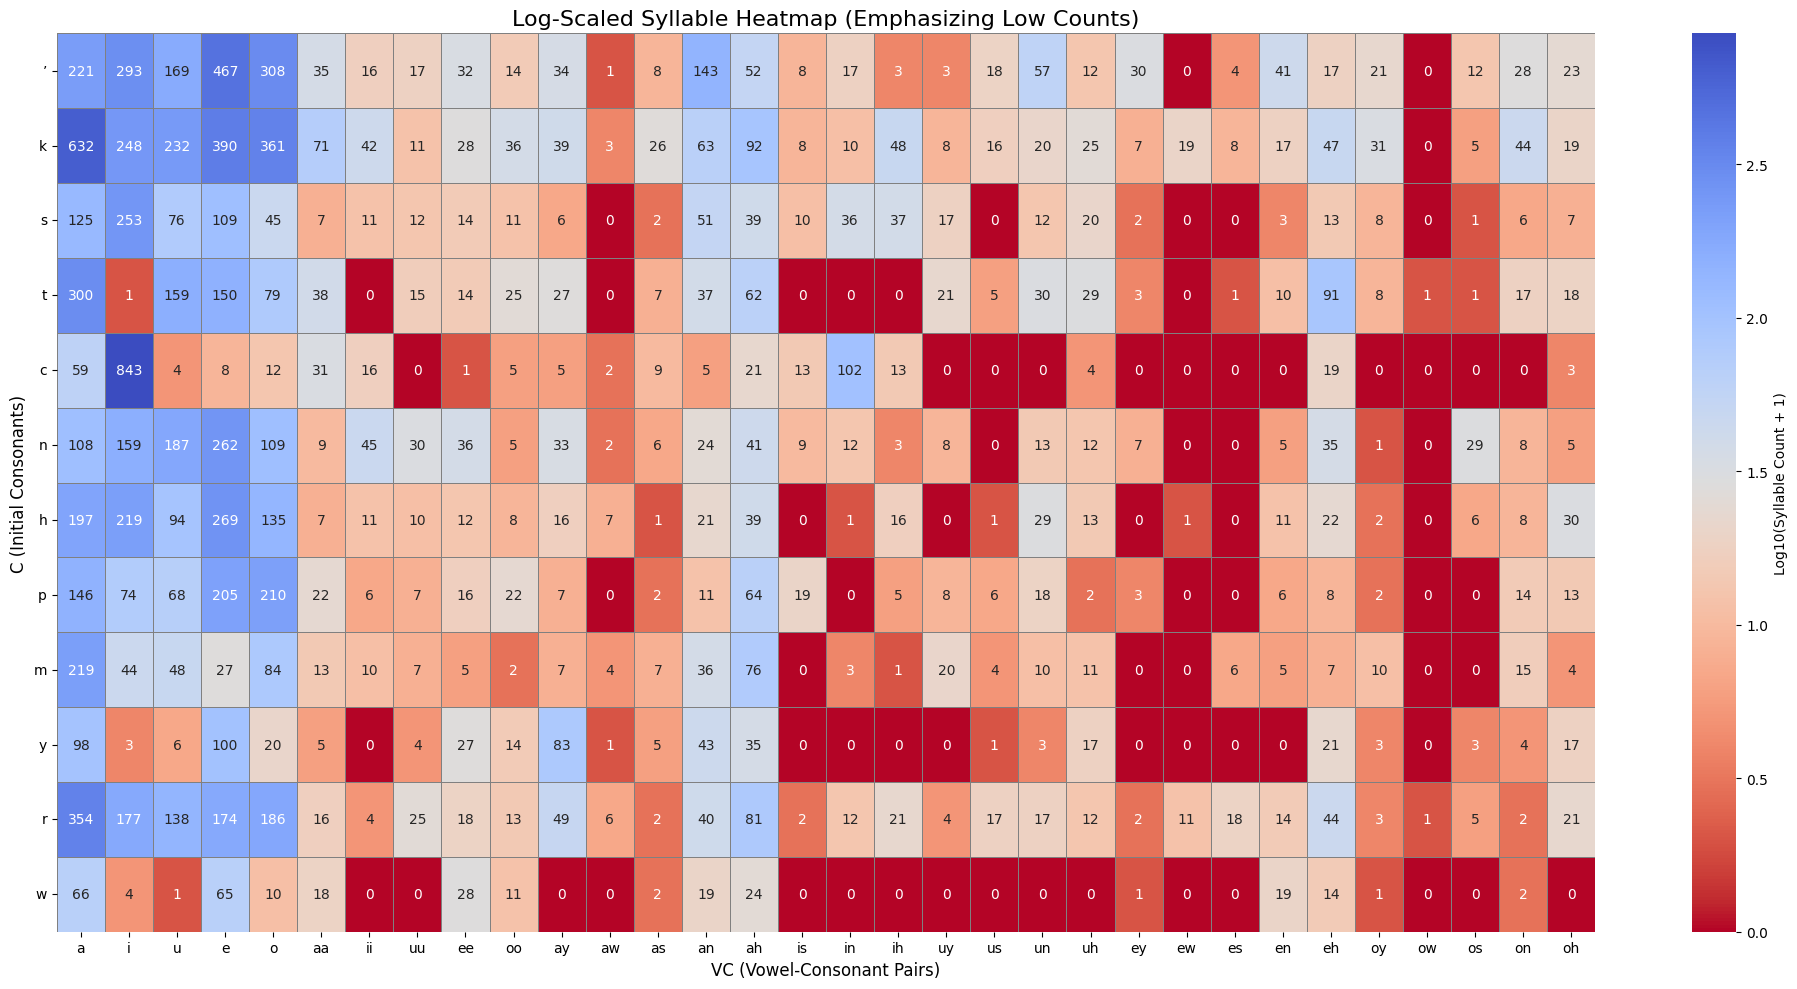

In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

log_df = np.log10(df + 1)

plt.figure(figsize=(20, 10))
sns.heatmap(
    log_df,
    annot=df,
    fmt="d",
    cmap="coolwarm_r",
    linewidths=0.5,
    linecolor="gray",
    cbar_kws={"label": "Log10(Syllable Count + 1)"},
)

plt.title("Log-Scaled Syllable Heatmap (Emphasizing Low Counts)", fontsize=16)
plt.xlabel("VC (Vowel-Consonant Pairs)", fontsize=12)
plt.ylabel("C (Initial Consonants)", fontsize=12)

plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [61]:
df = df.replace(0, "")

df.to_csv("../output/sakhalin_syllables.tsv", sep="\t")

### 樺太アイヌのテーブル

In [69]:
for row in row_order:
    for col in col_order[15:]:
        print(f"{row}{col}", end=" || ")
    print()

’is || ’in || ’ih || ’uy || ’us || ’un || ’uh || ’ey || ’ew || ’es || ’en || ’eh || ’oy || ’ow || ’os || ’on || ’oh || 
kis || kin || kih || kuy || kus || kun || kuh || key || kew || kes || ken || keh || koy || kow || kos || kon || koh || 
sis || sin || sih || suy || sus || sun || suh || sey || sew || ses || sen || seh || soy || sow || sos || son || soh || 
tis || tin || tih || tuy || tus || tun || tuh || tey || tew || tes || ten || teh || toy || tow || tos || ton || toh || 
cis || cin || cih || cuy || cus || cun || cuh || cey || cew || ces || cen || ceh || coy || cow || cos || con || coh || 
nis || nin || nih || nuy || nus || nun || nuh || ney || new || nes || nen || neh || noy || now || nos || non || noh || 
his || hin || hih || huy || hus || hun || huh || hey || hew || hes || hen || heh || hoy || how || hos || hon || hoh || 
pis || pin || pih || puy || pus || pun || puh || pey || pew || pes || pen || peh || poy || pow || pos || pon || poh || 
mis || min || mih || muy || mus || mun |

## 非樺太アイヌ語の音節一覧

In [85]:
from pathlib import Path
words_non_sakhalin: dict[str, int] = defaultdict(int)

MODERN_WORDS = {"アイヌタイムズ", "プラハ宣言", "ウポポイ館内展示", "萱野茂の国会演説"}


for path in Path("../../corpus/output/words_by_book").glob("*.tsv"):
    if path.stem in SAKHALIN_BOOKS:
        continue
    if path.stem in MODERN_WORDS:
        continue
    with open(path) as f:
        for line in f:
            try:
                word, freq = line.strip().split("\t")
                words_non_sakhalin[word] += int(freq)
            except ValueError:
                print(line)

print(sorted(words_non_sakhalin.items(), key=lambda x: x[1], reverse=True)[:10])

	1

[('a=', 50826), ('ne', 38653), ('wa', 37686), ('=an', 31763), ('kor', 26296), ('an', 22928), ('ka', 18621), ('ta', 15455), ('hine', 13843), ('e=', 12894)]


In [86]:
import pandas as pd
import ainconv

from collections import Counter

syllable_counts = Counter(
    [syllable if syllable[0] not in vowels else "’" + syllable for word in words_non_sakhalin.keys() for syllable in ainconv.separate(word.lower().replace("=", "")) if syllable]
)

row_order = ["’", "k", "s", "t", "c", "n", "h", "p", "m", "y", "r", "w"]
col_order = [
    "a",
    "i",
    "u",
    "e",
    "o",
    # "aa",
    # "ii",
    # "uu",
    # "ee",
    # "oo",
    "ay",
    "aw",
    "as",
    "an",
    "am",
    "ap",
    "at",
    "ak",
    "ar",
    # "ah",
    "is",
    "in",
    # "ih",
    "im",
    "ip",
    "it",
    "ik",
    "ir",
    "uy",
    "us",
    "un",
    # "uh",
    "um",
    "up",
    "ut",
    "uk",
    "ur",
    "ey",
    "ew",
    "es",
    "en",
    # "eh",
    "em",
    "ep",
    "et",
    "ek",
    "er",
    "oy",
    "ow",
    "os",
    "on",
    # "oh",
    "om",
    "op",
    "ot",
    "ok",
    "or",
]

parsed_syllables = {}
for syllable, count in syllable_counts.items():
    if len(syllable) >= 2:  # Only valid CVC syllables
        c = syllable[0]  # First consonant
        vc = syllable[1:]  # Vowel and following consonant(s)
        if c not in parsed_syllables:
            parsed_syllables[c] = {}
        parsed_syllables[c][vc] = count

df = pd.DataFrame.from_dict(parsed_syllables, orient="index").fillna(0).astype(int)

# extra_rows = [row for row in df.index if row not in row_order]
# extra_cols = [col for col in df.columns if col not in col_order]

# final_row_order = row_order + extra_rows
# final_col_order = col_order + extra_cols

# df = df.reindex(index=final_row_order, columns=final_col_order).fillna(0).astype(int)
df = df.reindex(index=row_order, columns=col_order).fillna(0).astype(int)


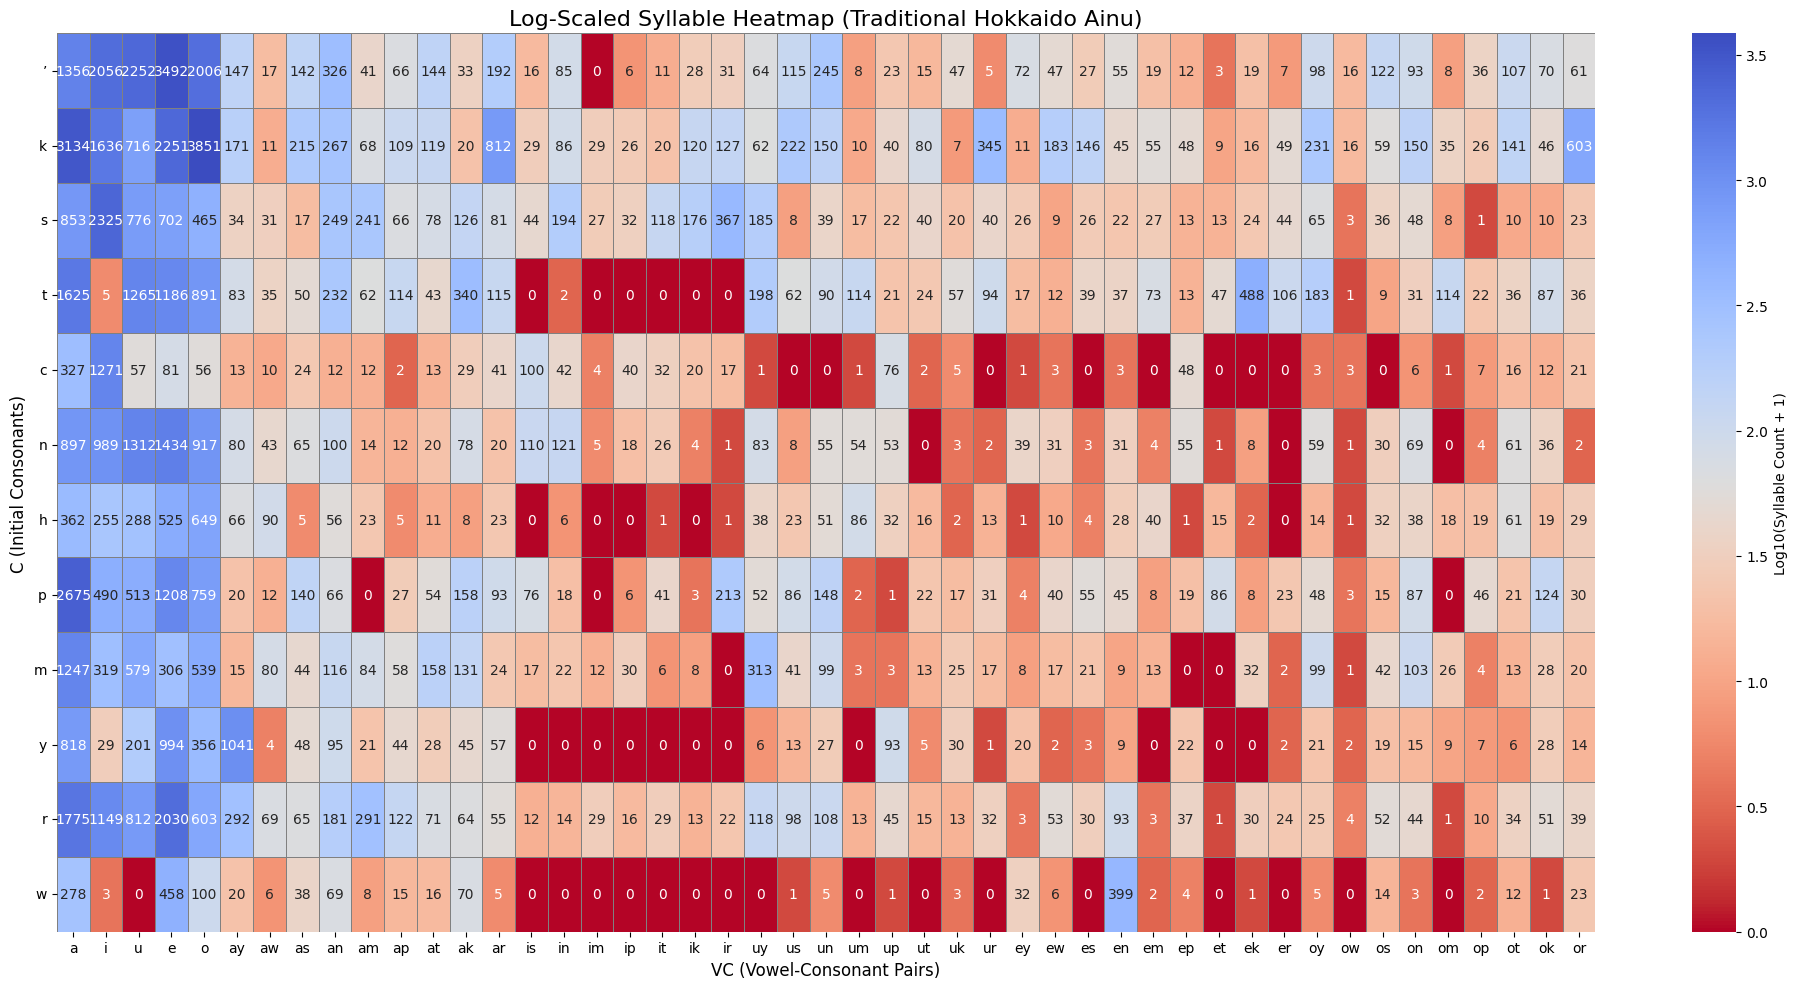

In [87]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

log_df = np.log10(df + 1)

plt.figure(figsize=(20, 10))
sns.heatmap(
    log_df,
    annot=df,
    fmt="d",
    cmap="coolwarm_r",
    linewidths=0.5,
    linecolor="gray",
    cbar_kws={"label": "Log10(Syllable Count + 1)"},
)

plt.title("Log-Scaled Syllable Heatmap (Traditional Hokkaido Ainu)", fontsize=16)
plt.xlabel("VC (Vowel-Consonant Pairs)", fontsize=12)
plt.ylabel("C (Initial Consonants)", fontsize=12)

plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [88]:
df = df.replace(0, "")
df.to_csv("../output/sakhalin_syllables_non.tsv", sep="\t")